In [1]:
# 라이브러리 추가
import urllib.request
import json
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.5)
import matplotlib.pyplot as plt

In [2]:
# 데이터랩 API
client_id = "89L30Y3xCshEctCoab1v"
client_secret = "aIoL3WXAsj"

url = "https://openapi.naver.com/v1/datalab/search"
    
body = {
    "startDate":"2016-01-01",
    "endDate":"2019-06-30",
    "timeUnit":"date",
    "keywordGroups":[
        {"groupName":"국립공원","keywords":["국립공원"]},
        {"groupName":"깃대종","keywords":["깃대종"]},
    ],
}
body = json.dumps(body)
    
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
json_obj = json.loads(response.read().decode('utf-8'))

print(json_obj)

{'results': [{'keywords': ['국립공원'], 'title': '국립공원', 'data': [{'period': '2016-01-01', 'ratio': 9.6}, {'period': '2016-01-02', 'ratio': 9.27407}, {'period': '2016-01-03', 'ratio': 8.65185}, {'period': '2016-01-04', 'ratio': 14.07407}, {'period': '2016-01-05', 'ratio': 11.49629}, {'period': '2016-01-06', 'ratio': 10.6074}, {'period': '2016-01-07', 'ratio': 11.05185}, {'period': '2016-01-08', 'ratio': 10.42962}, {'period': '2016-01-09', 'ratio': 7.73333}, {'period': '2016-01-10', 'ratio': 7.43703}, {'period': '2016-01-11', 'ratio': 12.56296}, {'period': '2016-01-12', 'ratio': 11.49629}, {'period': '2016-01-13', 'ratio': 11.46666}, {'period': '2016-01-14', 'ratio': 12.56296}, {'period': '2016-01-15', 'ratio': 14.04444}, {'period': '2016-01-16', 'ratio': 9.21481}, {'period': '2016-01-17', 'ratio': 9.03703}, {'period': '2016-01-18', 'ratio': 14.07407}, {'period': '2016-01-19', 'ratio': 16.85925}, {'period': '2016-01-20', 'ratio': 13.92592}, {'period': '2016-01-21', 'ratio': 11.55555}, {'per

In [3]:
# 데이터프레임 병합
df1 = pd.DataFrame(json_obj['results'][0]['data']); df1.columns=['기간', '국립공원']; df1.set_index('기간')
df2 = pd.DataFrame(json_obj['results'][1]['data']); df2.columns=['기간', '깃대종']; df2.set_index('기간')
df = df1.merge(df2, how='outer', on='기간').fillna(0)

df.head(10)

,기간,국립공원,깃대종
0,2016-01-01,9.60000,0.00000
1,2016-01-02,9.27407,0.14814
2,2016-01-03,8.65185,0.23703
3,2016-01-04,14.07407,0.41481
4,2016-01-05,11.49629,0.59259
5,2016-01-06,10.60740,0.38518
6,2016-01-07,11.05185,0.14814
7,2016-01-08,10.42962,0.35555
8,2016-01-09,7.73333,0.00000
9,2016-01-10,7.43703,0.00000


In [4]:
# 데이터랩 API 검색결과를 엑셀파일로 저장
df.to_excel('D:/GEODATA/datalab.xlsx')

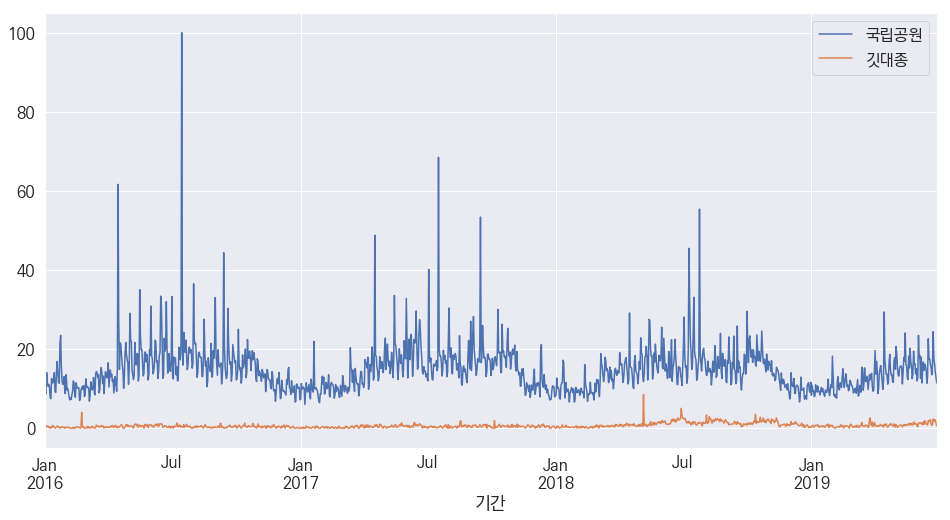

In [5]:
# '국립공원'과 '깃대종' 검색량 라인 플롯
df = pd.read_excel('D:/GEODATA/datalab.xlsx', sheet_name='Sheet1' ,index_col='기간', parse_dates=True).drop(['Unnamed: 0'], axis=1)
df.plot(figsize=(16, 8))
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

In [6]:
# 피어슨 상관계수
df['국립공원'].corr(df['깃대종'], method='pearson')

0.2006594339725783

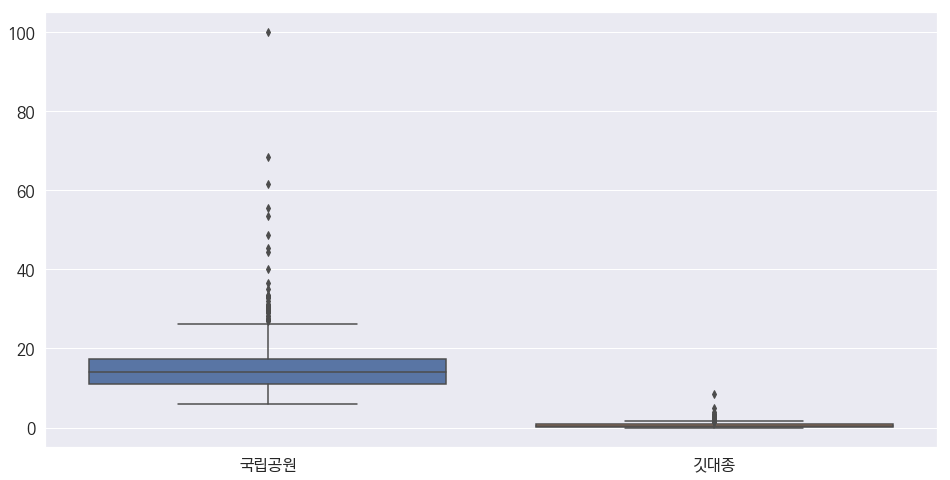

In [7]:
# '국립공원'과 '깃대종' 검색량 박스 플롯
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[['국립공원', '깃대종']])
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')

In [8]:
# '국립공원'과 '깃대종' 검색량 연평균
df.groupby(df.index.year).mean()

,국립공원,깃대종
기간,,
2016,15.207200,0.386962
2017,15.153806,0.402877
2018,14.594820,1.095398
2019,13.007894,0.748267


In [9]:
# 퍼센트 변화
df.groupby(df.index.year).mean().pct_change()

,국립공원,깃대종
기간,,
2016,NaN,NaN
2017,-0.003511,0.041130
2018,-0.036887,1.718937
2019,-0.108732,-0.316900


In [10]:
print('국립공원 검색량은 2016년 대비 ' + format(((13.007894 - 15.207200) / 15.207200) * 100, ".1f") + '% 증감')
print('깃대종 검색량은 2016년 대비 ' + format(((0.748267 - 0.386962) / 0.386962) * 100, ".1f") + '% 증감')

국립공원 검색량은 2016년 대비 -14.5% 증감
깃대종 검색량은 2016년 대비 93.4% 증감


In [11]:
# 연월평균 검색량
df['Year'] = df.index.year; df['Month'] = df.index.month
df = df.groupby([df.index.year, df.index.month]).mean()

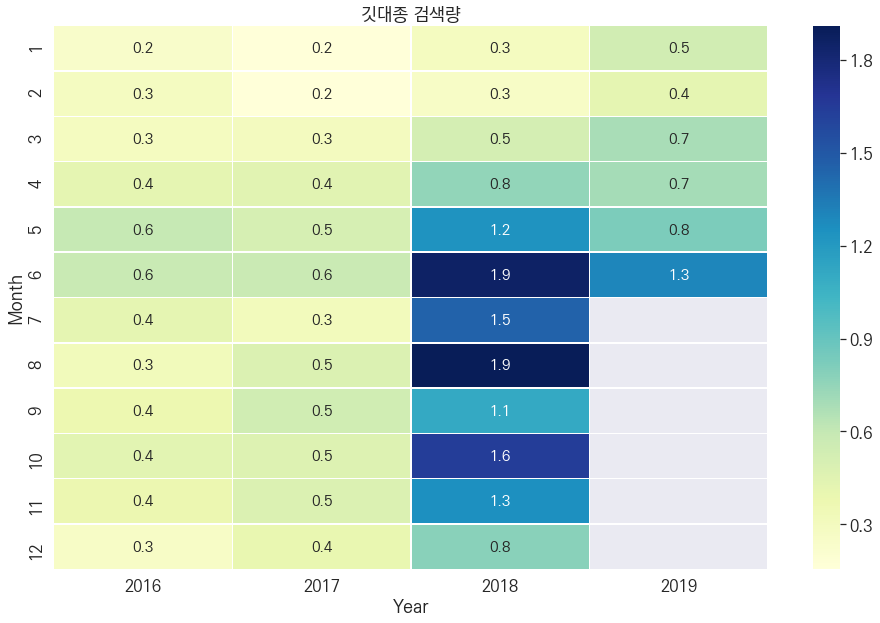

In [12]:
# '깃대종' 열지도
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df.pivot("Month", "Year", "깃대종"), cmap="YlGnBu",
            annot=True, annot_kws={"size": 15}, fmt='.1f', linewidths=.5, ax=ax)
ax.set_title('깃대종 검색량')
plt.savefig('D:/GEODATA/IMG03.png', bbox_inches='tight')

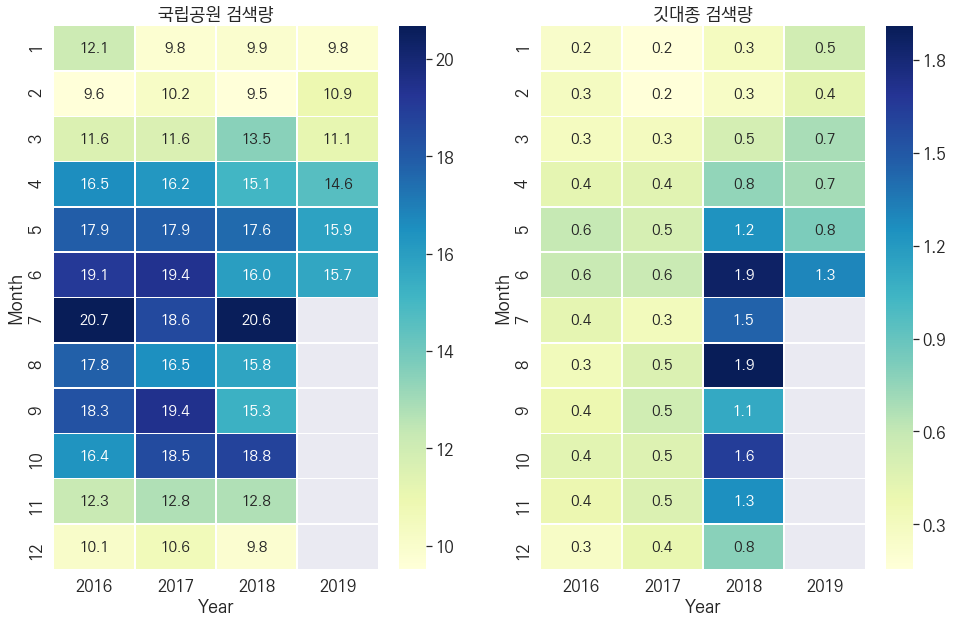

In [13]:
# '국립공원'과 '깃대종' 검색량 열지도
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))
sns.heatmap(df.pivot("Month", "Year", "국립공원"), cmap="YlGnBu",
            annot=True, annot_kws={"size": 15}, fmt='.1f', linewidths=.5, ax=ax1)
sns.heatmap(df.pivot("Month", "Year", "깃대종"), cmap="YlGnBu",
            annot=True, annot_kws={"size": 15}, fmt='.1f', linewidths=.5, ax=ax2)
ax1.set_title('국립공원 검색량')
ax2.set_title('깃대종 검색량')
plt.savefig('D:/GEODATA/IMG04.png', bbox_inches='tight')